# Research on apartment sales ads

You will have the data from a real estate agency. It is an archive of sales ads for realty in St. Petersburg, Russia, and the surrounding areas collected over the past few years. You’ll need to learn how to determine the market value of real estate properties. Your task is to define the parameters. This will make it possible to build an automated system that is capable of detecting anomalies and fraudulent activity.

There are two different types of data available for every apartment for sale. The first type is a user’s input. The second type is received automatically based upon the map data. For example, the distance from the downtown area, airport, the nearest park or body of water. 

### Step 1. Open the data file and study the general information. 

In [2]:
import pandas as pd
file = pd.read_csv('/datasets/real_estate_data_eng.csv', sep='\t')
print(file.info())
print(file.head(25))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

### Conclusion

### Step 2. Data preprocessing

In [ ]:
file.isnull().sum()


In [ ]:
file['floors_total'] = (file['floors_total'].fillna(0))
file['floors_total'].isnull().sum()
file['floors_total'].unique()

In [ ]:
file['floors_total'] = file['floors_total'].astype('int')
file['floors_total'].describe()

# Changing the datatype to 'int' as floors can't be float. 

In [ ]:
file['is_apartment'] = (file['is_apartment'].fillna('True'))
file['is_apartment'].isnull().sum()
file['is_apartment'].value_counts()

In [134]:
file['is_apartment'] = file['is_apartment'].astype('bool')
file['is_apartment'].describe()

count     23699
unique        2
top        True
freq      20974
Name: is_apartment, dtype: object

In [135]:
file['balcony'] = (file['balcony'].fillna(0))
file['balcony'].isnull().sum()

0

In [136]:
file['balcony'] = file['balcony'].astype('int')

In [137]:
file['ceiling_height'] = (file['ceiling_height'].fillna(2.4))
file['ceiling_height'].isnull().sum()
file['ceiling_height'] = file['ceiling_height'].astype('float')
file['ceiling_height'].describe()

count    23699.000000
mean         2.627361
std          1.002996
min          1.000000
25%          2.400000
50%          2.500000
75%          2.700000
max        100.000000
Name: ceiling_height, dtype: float64

In [138]:
file['living_area'] = (file['living_area'].fillna(0))
file['living_area'].isnull().sum()

0

In [139]:
file['living_area'] = file['living_area'].astype('float')

In [140]:
## Reviewer's code

#(file['living_area'] > file['total_area']).sum()

# Changed the datatype to float, as this can have float value.

In [141]:
average_kitchen_area = file['kitchen_area'].mean()
file['kitchen_area'] = (file['kitchen_area'].fillna(average_kitchen_area))
file['kitchen_area'].isnull().sum()
file['kitchen_area'].describe()

count    23699.000000
mean        10.569807
std          5.614434
min          1.300000
25%          7.400000
50%         10.000000
75%         11.440000
max        112.000000
Name: kitchen_area, dtype: float64

In [142]:
(file['kitchen_area'] > file['total_area']).sum()

0

# kitchen area empty values are filled with average value from the column. 

In [143]:
#import pandas as pd
#file = pd.read_csv('/datasets/real_estate_data_eng.csv', sep='\t')
file['locality_name'] = (file['locality_name'].fillna('other'))
file['locality_name'].isnull().sum()

0

# filled locality empty values with other as this is not known.

In [144]:
file['airports_nearest'] = (file['airports_nearest'].fillna(0))
file['airports_nearest'].isnull().sum()

0

# filled empty values with 0, where i am considering 0 as there is no nearest airport.

In [145]:
file['cityCenters_nearest'] = (file['cityCenters_nearest'].fillna(0))
file['cityCenters_nearest'].isnull().sum()

0

In [146]:
file['cityCenters_nearest'] = file['cityCenters_nearest'].astype('float')

In [147]:
file['parks_nearest'] = (file['parks_nearest'].fillna('0'))
file['parks_nearest'].isnull().sum()

0

In [148]:
file['parks_nearest'].astype('float')

0        482.0
1          0.0
2         90.0
3         84.0
4        112.0
         ...  
23694    796.0
23695      0.0
23696      0.0
23697    173.0
23698      0.0
Name: parks_nearest, Length: 23699, dtype: float64

In [149]:
file['ponds_nearest'] = (file['ponds_nearest'].fillna('0'))
file['ponds_nearest'].isnull().sum()

0

In [150]:
file['ponds_nearest'].astype('float')

0        755.0
1          0.0
2        574.0
3        234.0
4         48.0
         ...  
23694    381.0
23695      0.0
23696      0.0
23697    196.0
23698      0.0
Name: ponds_nearest, Length: 23699, dtype: float64

In [151]:
file['parks_around3000'] = (file['parks_around3000'].fillna('0'))
file['parks_around3000'].isnull().sum()

0

In [152]:
file['parks_around3000'].astype('float')

0        1.0
1        0.0
2        1.0
3        2.0
4        2.0
        ... 
23694    1.0
23695    0.0
23696    0.0
23697    2.0
23698    0.0
Name: parks_around3000, Length: 23699, dtype: float64

In [153]:
file['ponds_around3000'] = (file['ponds_around3000'].fillna('0'))
file['ponds_around3000'].isnull().sum()

0

In [154]:
file['ponds_around3000'].astype('float')

0        2.0
1        0.0
2        2.0
3        3.0
4        1.0
        ... 
23694    3.0
23695    0.0
23696    0.0
23697    3.0
23698    0.0
Name: ponds_around3000, Length: 23699, dtype: float64

In [155]:
file['days_exposition'] = (file['days_exposition'].fillna('0'))
file['days_exposition'].isnull().sum()

0

In [156]:
file['days_exposition'].astype('float')

0          0.0
1         81.0
2        558.0
3        424.0
4        121.0
         ...  
23694      0.0
23695     45.0
23696      0.0
23697    602.0
23698      0.0
Name: days_exposition, Length: 23699, dtype: float64

In [157]:
file['first_day_exposition'] = pd.to_datetime(file['first_day_exposition'], format = '%Y-%m-%dT%H:%M:%S')

In [158]:
file['cityCenters_nearest'].astype('float')

0        16028.0
1        18603.0
2        13933.0
3         6800.0
4         8098.0
          ...   
23694     4232.0
23695        0.0
23696        0.0
23697    10364.0
23698        0.0
Name: cityCenters_nearest, Length: 23699, dtype: float64

In [159]:
file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 27 columns):
total_images             23699 non-null int64
last_price               23699 non-null float64
total_area               23699 non-null float64
first_day_exposition     23699 non-null datetime64[ns]
rooms                    23699 non-null int64
ceiling_height           23699 non-null float64
floors_total             23699 non-null int64
living_area              23699 non-null float64
floor                    23699 non-null int64
is_apartment             23699 non-null bool
studio                   23699 non-null bool
open_plan                23699 non-null bool
kitchen_area             23699 non-null float64
balcony                  23699 non-null int64
locality_name            23699 non-null object
airports_nearest         23699 non-null float64
cityCenters_nearest      23699 non-null float64
parks_around3000         23699 non-null object
parks_nearest            23699 non-null o

In [160]:
print(file.duplicated().sum())

0


### Step 3. Make calculations and add them to the table

In [161]:
file['price_per_squaremeter'] = file['last_price'] / file['total_area']
print(file['price_per_squaremeter'])

0        120370.370370
1         82920.792079
2         92785.714286
3        408176.100629
4        100000.000000
             ...      
23694     72490.845228
23695     52542.372881
23696     44091.710758
23697    149511.400651
23698     41795.665635
Name: price_per_squaremeter, Length: 23699, dtype: float64


In [162]:
#import pandas as pd
#import datetime
#file = pd.read_csv('/datasets/real_estate_data_eng.csv', sep='\t')
file['year'] = pd.DatetimeIndex(file['first_day_exposition']).year
print(file)

       total_images  last_price  total_area first_day_exposition  rooms  \
0                20  13000000.0      108.00           2019-03-07      3   
1                 7   3350000.0       40.40           2018-12-04      1   
2                10   5196000.0       56.00           2015-08-20      2   
3                 0  64900000.0      159.00           2015-07-24      3   
4                 2  10000000.0      100.00           2018-06-19      2   
...             ...         ...         ...                  ...    ...   
23694             9   9700000.0      133.81           2017-03-21      3   
23695            14   3100000.0       59.00           2018-01-15      3   
23696            18   2500000.0       56.70           2018-02-11      2   
23697            13  11475000.0       76.75           2017-03-28      2   
23698             4   1350000.0       32.30           2017-07-21      1   

       ceiling_height  floors_total  living_area  floor  is_apartment  ...  \
0                2.70

In [163]:
file['Month'] = pd.DatetimeIndex(file['first_day_exposition']).month
print(file)

       total_images  last_price  total_area first_day_exposition  rooms  \
0                20  13000000.0      108.00           2019-03-07      3   
1                 7   3350000.0       40.40           2018-12-04      1   
2                10   5196000.0       56.00           2015-08-20      2   
3                 0  64900000.0      159.00           2015-07-24      3   
4                 2  10000000.0      100.00           2018-06-19      2   
...             ...         ...         ...                  ...    ...   
23694             9   9700000.0      133.81           2017-03-21      3   
23695            14   3100000.0       59.00           2018-01-15      3   
23696            18   2500000.0       56.70           2018-02-11      2   
23697            13  11475000.0       76.75           2017-03-28      2   
23698             4   1350000.0       32.30           2017-07-21      1   

       ceiling_height  floors_total  living_area  floor  is_apartment  ...  \
0                2.70

In [164]:
file['Day'] = pd.DatetimeIndex(file['first_day_exposition']).day
print(file)

       total_images  last_price  total_area first_day_exposition  rooms  \
0                20  13000000.0      108.00           2019-03-07      3   
1                 7   3350000.0       40.40           2018-12-04      1   
2                10   5196000.0       56.00           2015-08-20      2   
3                 0  64900000.0      159.00           2015-07-24      3   
4                 2  10000000.0      100.00           2018-06-19      2   
...             ...         ...         ...                  ...    ...   
23694             9   9700000.0      133.81           2017-03-21      3   
23695            14   3100000.0       59.00           2018-01-15      3   
23696            18   2500000.0       56.70           2018-02-11      2   
23697            13  11475000.0       76.75           2017-03-28      2   
23698             4   1350000.0       32.30           2017-07-21      1   

       ceiling_height  floors_total  living_area  floor  is_apartment  ...  \
0                2.70

In [165]:
# Extracted Day from Date

In [166]:
#def floor_apartment(floor):
    #if floor == 1:
        #return 'first'
    #if floor == file['floors_total'].idxmax():
        #return 'last'
    #return 'other'
#file['floor_apartment'] = file['floors_total'].apply(floor_apartment)
#print(file['floor_apartment'])

In [167]:
def floor_apartment(row):
    if row['floor'] == 1:
        return 'first'
    elif row['floor'] == row['floors_total']:
        return 'last'
    return 'other'

file['floor_apartment'] = file.apply(floor_apartment, axis=1)
print(file['floor_apartment'])

0        other
1        first
2        other
3        other
4        other
         ...  
23694    other
23695    other
23696    first
23697    other
23698    first
Name: floor_apartment, Length: 23699, dtype: object


In [168]:
file['ratio_living_area'] = file['living_area'] / file['total_area']
print(file['ratio_living_area'])

0        0.472222
1        0.460396
2        0.612500
3        0.000000
4        0.320000
           ...   
23694    0.547792
23695    0.644068
23696    0.523810
23697    0.000000
23698    0.380805
Name: ratio_living_area, Length: 23699, dtype: float64


In [169]:
file['kitchen_area'] = file['kitchen_area'] / file['total_area']
print(file['kitchen_area'])

0        0.231481
1        0.272277
2        0.148214
3        0.066477
4        0.410000
           ...   
23694    0.103356
23695    0.144068
23696    0.186416
23697    0.303583
23698    0.278638
Name: kitchen_area, Length: 23699, dtype: float64


### Step 4. Conduct exploratory data analysis and follow the instructions below:

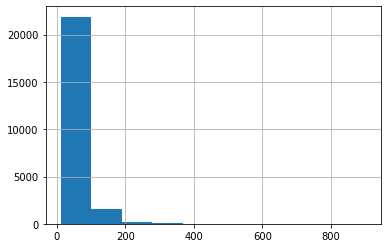

In [170]:
file['total_area'].hist()

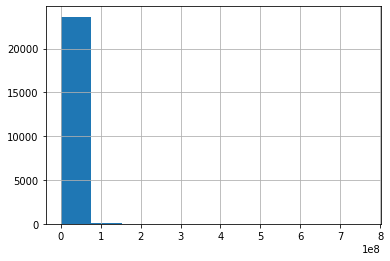

In [171]:
file['last_price'].hist()

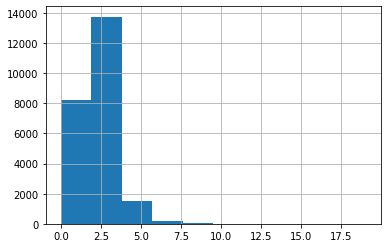

In [172]:
file['rooms'].hist()

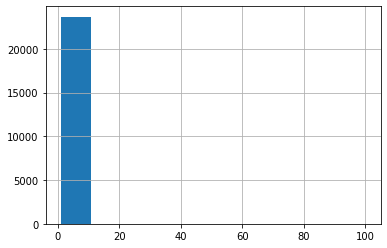

In [173]:
file['ceiling_height'].hist()

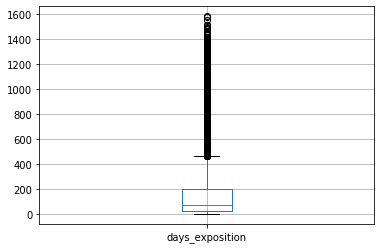

count    23699.000000
mean       156.608844
std        213.546873
min          0.000000
25%         22.000000
50%         74.000000
75%        199.000000
max       1580.000000
Name: days_exposition, dtype: float64

In [174]:
#import pandas as pd
import matplotlib.pyplot as plt
#file = pd.read_csv('/datasets/real_estate_data_eng.csv', sep='\t')

file["days_exposition"] = file["days_exposition"].astype(int)
file.boxplot(column="days_exposition")
plt.show()
file['days_exposition'].describe()

In [175]:
#file.boxplot()

count    2.369900e+04
mean     6.541549e+06
std      1.088701e+07
min      1.219000e+04
25%      3.400000e+06
50%      4.650000e+06
75%      6.800000e+06
max      7.630000e+08
Name: last_price, dtype: float64

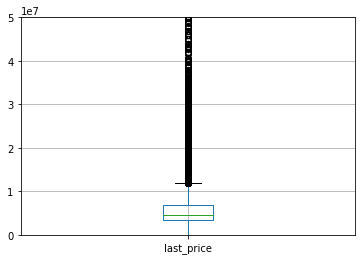

In [176]:
file.boxplot(column="last_price")
plt.ylim(0,50000000)
file['last_price'].describe()

In [177]:
file[file.last_price > 700000000]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_per_squaremeter,year,Month,Day,floor_apartment,ratio_living_area
12971,19,763000000.0,400.0,2017-09-30,7,2.4,10,250.0,10,True,...,530,3,756,33,1907500.0,2017,9,30,last,0.625


In [178]:
file.drop([12971], inplace=True)

In [179]:
file[12970:12972]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_per_squaremeter,year,Month,Day,floor_apartment,ratio_living_area
12970,13,2100000.0,32.0,2017-11-09,1,2.4,5,18.0,3,True,...,0,1,373,4,65625.000000,2017,11,9,other,0.562500
12972,5,2150000.0,47.0,2018-02-26,2,2.5,5,29.0,4,True,...,0,0,0,7,45744.680851,2018,2,26,other,0.617021


In [180]:
file['cityCenters_nearest'].describe()

count    23698.000000
mean     10886.719343
std       9634.711792
min          0.000000
25%       2242.000000
50%      11247.000000
75%      15249.250000
max      65968.000000
Name: cityCenters_nearest, dtype: float64

In [181]:
file['cityCenters_nearest'].astype('float')

0        16028.0
1        18603.0
2        13933.0
3         6800.0
4         8098.0
          ...   
23694     4232.0
23695        0.0
23696        0.0
23697    10364.0
23698        0.0
Name: cityCenters_nearest, Length: 23698, dtype: float64

In [182]:
file.corr()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,...,kitchen_area,balcony,airports_nearest,cityCenters_nearest,days_exposition,price_per_squaremeter,year,Month,Day,ratio_living_area
total_images,1.000000,0.111798,0.114932,0.099027,0.016958,0.014903,0.129822,0.031286,0.039838,-0.029299,...,-0.058861,0.048808,0.039927,0.002324,-0.055558,0.134052,0.140443,0.004992,0.010135,0.079497
last_price,0.111798,1.000000,0.702586,0.392334,0.076503,-0.007635,0.519849,0.027020,-0.000467,-0.028160,...,-0.132451,0.004766,0.120447,-0.054746,0.061943,0.727362,-0.047128,0.000668,0.004758,-0.012058
total_area,0.114932,0.702586,1.000000,0.758293,0.086287,-0.075735,0.790927,-0.025141,-0.007996,-0.072761,...,-0.374744,0.009369,0.091364,-0.076858,0.097459,0.296252,-0.079923,0.004630,0.003879,0.052515
rooms,0.099027,0.392334,0.758293,1.000000,0.056793,-0.226040,0.744600,-0.151093,-0.005410,-0.147336,...,-0.612762,-0.015810,0.047527,-0.059733,0.079440,0.049887,-0.055375,-0.004615,0.003965,0.257742
ceiling_height,0.016958,0.076503,0.086287,0.056793,1.000000,-0.036769,0.088652,-0.020990,-0.031890,-0.001622,...,-0.006737,0.046483,0.013470,-0.031677,0.010423,0.108374,0.020392,-0.005916,0.000253,0.031798
floors_total,0.014903,-0.007635,-0.075735,-0.226040,-0.036769,1.000000,-0.149908,0.667083,-0.005564,0.066999,...,0.327735,0.175202,0.160875,0.096302,-0.026130,0.150823,0.009267,0.016542,-0.001548,-0.195626
living_area,0.129822,0.519849,0.790927,0.744600,0.088652,-0.149908,1.000000,-0.086069,-0.029779,-0.048145,...,-0.450239,0.021801,0.072571,-0.055584,0.100292,0.188083,-0.088522,0.006120,0.008424,0.549854
floor,0.031286,0.027020,-0.025141,-0.151093,-0.020990,0.667083,-0.086069,1.000000,-0.006195,0.036944,...,0.228034,0.168525,0.109159,0.062555,-0.021329,0.131427,0.004927,0.019361,0.000782,-0.140395
is_apartment,0.039838,-0.000467,-0.007996,-0.005410,-0.031890,-0.005564,-0.029779,-0.006195,1.000000,0.003570,...,0.006198,-0.155336,0.001019,-0.003133,-0.068951,0.006026,0.216591,0.111610,-0.009465,-0.042637
studio,-0.029299,-0.028160,-0.072761,-0.147336,-0.001622,0.066999,-0.048145,0.036944,0.003570,1.000000,...,0.210376,0.028905,-0.032253,-0.021864,-0.017768,0.016205,0.011959,0.000979,-0.012828,0.050377


In [183]:
#I have found corr() to find the relationship between two columns.
#From my analysis Total Square Area influences Price.
#No.of rooms and last price has a correlation of 0.39 which is not influencing on the price.
#Floor is having 0.02 which is not influencing the price
#CityCentre is having -0.05 which is not at all influencing the price
#Day of Week is having 0.0047 which is not influencing on the price
#Month is having 0.00066 which is not influencing on the price
#Year is having -0.047 which is not influencing on the price

In [184]:
#file.drop(columns=['top_10_localities'])

In [185]:
file['locality_name'].value_counts().head(10)

Saint Peterburg      15720
Murino village         556
Shushary village       440
Vsevolozhsk            398
Pushkin                369
Kolpino                338
Pargolovo village      327
Gatchina               307
Kudrovo village        299
Vyborg                 237
Name: locality_name, dtype: int64

In [186]:
top_localities = ['Saint Peterburg', 'Murino village', 'Shushary village', 'Vsevolozhsk', 'Pushkin', 'Kolpino', 'Pargolovo village', 'Gatchina', 'Kudrovo village', 'Vyborg']
top_10_test = file['locality_name'].isin(top_localities)
df_top_10 = file[top_10_test]
print(df_top_10)

       total_images  last_price  total_area first_day_exposition  rooms  \
0                20  13000000.0      108.00           2019-03-07      3   
1                 7   3350000.0       40.40           2018-12-04      1   
2                10   5196000.0       56.00           2015-08-20      2   
3                 0  64900000.0      159.00           2015-07-24      3   
4                 2  10000000.0      100.00           2018-06-19      2   
...             ...         ...         ...                  ...    ...   
23689            13   3550000.0       35.30           2018-02-28      1   
23690             3   5500000.0       52.00           2018-07-19      2   
23691            11   9470000.0       72.90           2016-10-13      2   
23694             9   9700000.0      133.81           2017-03-21      3   
23697            13  11475000.0       76.75           2017-03-28      2   

       ceiling_height  floors_total  living_area  floor  is_apartment  ...  \
0                2.70

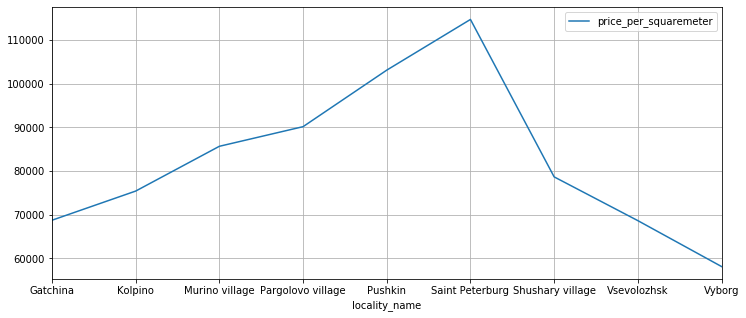

In [187]:
(df_top_10
         .pivot_table(index='locality_name', values='price_per_squaremeter', aggfunc='mean')
         .plot(grid=True, figsize=(12,5)))

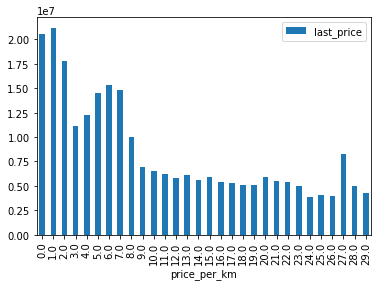

In [188]:
downtown = file[file['locality_name'] == 'Saint Peterburg'].reset_index(drop=True)
downtown['price_per_km'] = downtown['cityCenters_nearest'] / 1000
downtown['price_per_km'] = downtown['price_per_km'].round()
downtown = downtown.pivot_table(index= 'price_per_km', values='last_price', aggfunc='mean')
downtown.plot(kind='bar', y='last_price')

,total_area,last_price,rooms,ceiling_height
total_area,1.000000,0.721687,0.767173,0.135304
last_price,0.721687,1.000000,0.408601,0.101416
rooms,0.767173,0.408601,1.000000,0.105408
ceiling_height,0.135304,0.101416,0.105408,1.000000


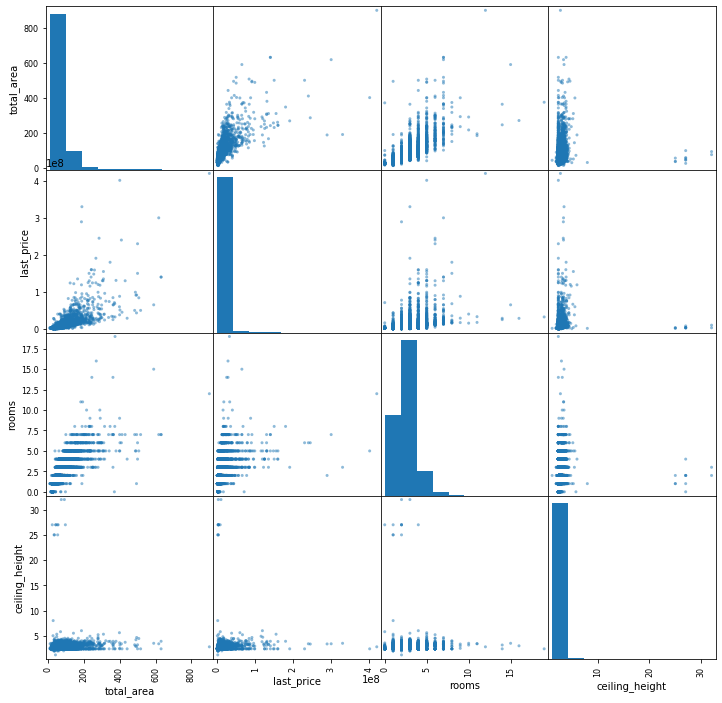

In [189]:
apartments_downtown = file[file['cityCenters_nearest'] <= 8000]
apartments = apartments_downtown[['total_area','last_price','rooms','ceiling_height']]
pd.plotting.scatter_matrix(apartments, figsize = (12, 12))
apartments.corr()

In [190]:
#filtered apartments which are located in 8 km. And found the correlation between the columns. The total area and price are related. Total area and rooms are related.
#Price and rooms are slightly related on each other. 

In [191]:
print(apartments_downtown.corr())

                       total_images  last_price  total_area     rooms  \
total_images               1.000000    0.128948    0.123388  0.105133   
last_price                 0.128948    1.000000    0.721687  0.408601   
total_area                 0.123388    0.721687    1.000000  0.767173   
rooms                      0.105133    0.408601    0.767173  1.000000   
ceiling_height             0.052340    0.101416    0.135304  0.105408   
floors_total              -0.036223   -0.016151   -0.110021 -0.250908   
living_area                0.134150    0.538512    0.794212  0.749915   
floor                     -0.004428    0.037732   -0.027818 -0.152049   
is_apartment               0.067466   -0.000219   -0.002455  0.001926   
studio                    -0.039686   -0.028662   -0.075013 -0.151519   
open_plan                 -0.042577   -0.008101   -0.034564 -0.095308   
kitchen_area              -0.060674   -0.145092   -0.389082 -0.582772   
balcony                    0.021008   -0.018691   -

In [192]:
# From this i analyse, No. of rooms is slightly positive, which means slightly affects on the price.
#Floor will not affect on the price.
#Downtown area will not affect the price.
#Date of Ad publication will not affect the price.
#It is same as the overall city, For the overall city data total area influences the price. Here from the downtown it is same.

### Step 5. Overall conclusion

In [66]:
#Based on the data i analyse that total area affects the price. There is nothing much difference with the parameters affecting the price.
#On Overall, the price affects based on the total area. If the total area increases, price increases. Rooms are based on the total area.